In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-06-18 14:08:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-18 14:08:46 (99.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-06-26 15:05:28--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.74.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-06-26 15:05:28 (119 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
train_df.target.value_counts()

NameError: ignored

In [ ]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)


In [ ]:
import random 
random_index = random.randint(0, len(train_df))
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

target: 0 (not real disaster)
Text:
Jen you da bomb girl! https://t.co/czQr3CI9Xw

---

target: 0 (not real disaster)
Text:
@JaydenNotJared I can't help it. Hope you're ok. Text me if you need to talk. Sending hugs your way. PS no bleeding to death allowed

---

target: 0 (not real disaster)
Text:
Canberra's first Mr Fluffy homes demolition schedule released  http://t.co/B77T2QxDCS

---

target: 1 (real disaster)
Text:
Learning from the Legacy of a Catastrophic Eruption http://t.co/25sY9Y295L via @newyorker

---

target: 0 (not real disaster)
Text:
@ChristyCroley Not in the works yet. Did you see the new Vela Short in Blaze? http://t.co/Q8rEoEVluE

---



In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
train_sentences[:10], train_labels[:10]


(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [ ]:
len(val_labels)

762

In [ ]:
import tensorflow as tf

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
#vectorize the text
max_vocab_length = 30000 
max_length = 15

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
#adapt the train sentences with the text vectorizer
text_vectorizer.adapt(train_sentences)

In [ ]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [ ]:
sample_sentences = "a guy has been swept by the river current"
text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   3,  848,   41,   59, 4482,   18,    2,  499, 3075,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
len(train_sentences)

6851

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")
embedding

In [ ]:
random_sentences = random.choice(train_sentences)
print(f"Original text:\n{random_sentences}\
      \n\nEmbedded version:")

sample_embed = embedding(text_vectorizer([random_sentences]))
sample_embed

Original text:
#Glaucoma occurs when fluid builds up pressure inside #eye to a level that may damage optic nerve #eyefacts      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01243996, -0.01806598, -0.03715152, ...,  0.04965765,
         -0.03668842,  0.02834726],
        [ 0.01935444, -0.0086211 , -0.03472777, ..., -0.03047936,
         -0.00213522,  0.00819369],
        [-0.00313113, -0.00795475, -0.02528534, ...,  0.04439649,
         -0.03303808, -0.00838274],
        ...,
        [-0.03755181,  0.03310534,  0.03260905, ..., -0.04549287,
         -0.02802461, -0.02160816],
        [ 0.01057792, -0.04194845,  0.01984035, ..., -0.04387189,
         -0.02655758,  0.02088613],
        [-0.01543689,  0.04724768,  0.04665958, ..., -0.01675825,
         -0.02281604, -0.02968755]]], dtype=float32)>

In [ ]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-1.2439955e-02, -1.8065978e-02, -3.7151515e-02,  1.2533817e-02,
       -2.2146761e-02,  6.4991228e-03,  1.7188612e-02,  3.7074257e-02,
        2.9728722e-02,  2.4688605e-02,  3.6251906e-02,  4.9239982e-02,
       -9.7294226e-03,  4.5734968e-02, -4.2936731e-02,  2.5864255e-02,
       -4.7831655e-02,  4.1128341e-02, -2.9786302e-02,  9.4394684e-03,
       -1.9507170e-02,  3.8741902e-04,  4.2386759e-02,  5.9722662e-03,
        2.7561892e-02, -3.7971746e-02,  5.1751733e-03,  4.9678314e-02,
       -4.2337086e-02,  2.3183774e-02,  4.0263597e-02,  1.9029703e-02,
        3.4086574e-02, -4.4545341e-02, -2.1927245e-03, -7.0283040e-03,
       -3.7002802e-02, -4.5357406e-02, -2.7614331e-02,  2.9497240e-02,
       -2.3776675e-02, -1.9000281e-02,  2.5054220e-02, -1.0405708e-02,
       -3.0033505e-02, -4.4271994e-02,  1.4096145e-02,  1.2023974e-02,
       -3.5097718e-02, -2.4853325e-02, -1.2145661e-02, -1.8006552e-02,
        4.6359684e-02, -4.860

In [ ]:
#Model 0
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_preds):

  model_accuracy = accuracy_score(y_true, y_preds)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(val_labels, baseline_preds)

# Model 1

In [ ]:
#model1
from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [ ]:
from tensorflow.keras import layers 
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs,outputs, name="model_1_dense")


In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           3840000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,840,129
Trainable params: 3,840,129
N

In [ ]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_simple_dense_model")])

Saving TensorBoard log files to: model_logs/model_1_simple_dense_model/20220618-140852
Epoch 1/5
215/215 [==============================] - 10s 41ms/step - loss: 0.6382 - accuracy: 0.6605 - val_loss: 0.5761 - val_accuracy: 0.7493
Epoch 2/5
215/215 [==============================] - 9s 40ms/step - loss: 0.4692 - accuracy: 0.8276 - val_loss: 0.4824 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 9s 40ms/step - loss: 0.3274 - accuracy: 0.8882 - val_loss: 0.4552 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 9s 40ms/step - loss: 0.2291 - accuracy: 0.9257 - val_loss: 0.4540 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 9s 40ms/step - loss: 0.1591 - accuracy: 0.9529 - val_loss: 0.4594 - val_accuracy: 0.7900


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7900


[0.45943373441696167, 0.7900262475013733]

In [ ]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
#!tensorboard dev upload --logdir ./model_logs \
#--name "First deep model on text data" \
#--description "Trying a dense model with an embedding layer" \
#--one_shot # exits the uploader when upload has finished

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

array([[0.4874556 ],
       [0.7946336 ],
       [0.9966361 ],
       [0.06893581],
       [0.26526847],
       [0.9753169 ],
       [0.9478942 ],
       [0.9952375 ],
       [0.89133734],
       [0.09834632]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

In [ ]:
model_1_results = calculate_results(y_true=val_labels, 
                                    y_preds=model_1_preds)
model_1_results

{'accuracy': 0.7900262467191601,
 'f1': 0.7877528154830449,
 'precision': 0.7930995271571797,
 'recall': 0.7900262467191601}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

In [ ]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 0.79, New accuracy: 0.79, Difference: -0.00
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.00
Baseline f1: 0.79, New f1: 0.79, Difference: 0.00


In [ ]:
baseline_results

{'accuracy': 0.7926509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
model_1_results

{'accuracy': 0.7900262467191601,
 'f1': 0.7877528154830449,
 'precision': 0.7930995271571797,
 'recall': 0.7900262467191601}

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(21056, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

# Model 2

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x =  model_2_embedding(x)
print(x.shape)
x = layers.LSTM(8)(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


(None, 15, 128)
(None, 8)


In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           3840000   
                                                                 
 lstm (LSTM)                 (None, 8)                 4384      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,844,393
Trainable params: 3,844,393
Non-trainable params: 0
____________________________________________

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220618-141015
Epoch 1/5
215/215 [==============================] - 12s 48ms/step - loss: 0.5764 - accuracy: 0.7162 - val_loss: 0.4932 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 10s 45ms/step - loss: 0.3279 - accuracy: 0.8847 - val_loss: 0.4969 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 10s 48ms/step - loss: 0.1759 - accuracy: 0.9451 - val_loss: 0.5425 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 10s 47ms/step - loss: 0.1012 - accuracy: 0.9683 - val_loss: 0.6207 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0572 - accuracy: 0.9834 - val_loss: 0.6816 - val_accuracy: 0.7677


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[0.01309639],
       [0.64416635],
       [0.988374  ],
       [0.00959501],
       [0.0490666 ],
       [0.9916756 ],
       [0.94462   ],
       [0.98923904],
       [0.9935286 ],
       [0.01136097]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [ ]:
model_2_preds 

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0

In [ ]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_preds=model_2_preds)
model_2_results

{'accuracy': 0.7677165354330708,
 'f1': 0.7651303822545579,
 'precision': 0.7702262582836057,
 'recall': 0.7677165354330708}

#Model 3

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
print(x.shape)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
# x = layers.GRU(256,return_sequences=True)(x) 
# x = layers.LSTM(128, return_sequences=True )(x) 
x = layers.GRU(64, return_sequences=True)(x) 

x = layers.GRU(16, return_sequences=True)(x) 
x = layers.GlobalMaxPool1D()(x)
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

(None, 15, 128)
(None, 16)


In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           3840000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 15, 16)            3936      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                      

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220618-141109
Epoch 1/5
215/215 [==============================] - 17s 61ms/step - loss: 0.5224 - accuracy: 0.7376 - val_loss: 0.4693 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 12s 57ms/step - loss: 0.2768 - accuracy: 0.8927 - val_loss: 0.5239 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 12s 57ms/step - loss: 0.1519 - accuracy: 0.9492 - val_loss: 0.5910 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 13s 62ms/step - loss: 0.0944 - accuracy: 0.9708 - val_loss: 0.7022 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 12s 57ms/step - loss: 0.0602 - accuracy: 0.9823 - val_loss: 0.7633 - val_accuracy: 0.7572


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [ ]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_preds=model_3_preds)
model_3_results

{'accuracy': 0.7572178477690289,
 'f1': 0.756620788716301,
 'precision': 0.7567841985628946,
 'recall': 0.7572178477690289}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 0.79, New accuracy: 0.76, Difference: -0.04
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


#Model 4

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x) 
# x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)
# x = layers.Bidirectional(layers.GRU(128, return_sequences=True))(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# x = layers.Bidirectional(layers.GRU(32, return_sequences=True))(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(64))(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

(None, 15, 128)
(None, 128)


In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           3840000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,938,945
Trainable params: 3,9

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional_RNN/20220618-141218
Epoch 1/5
215/215 [==============================] - 18s 64ms/step - loss: 0.5090 - accuracy: 0.7488 - val_loss: 0.4578 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 13s 60ms/step - loss: 0.2547 - accuracy: 0.9032 - val_loss: 0.5509 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 13s 59ms/step - loss: 0.1207 - accuracy: 0.9581 - val_loss: 0.6655 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 13s 59ms/step - loss: 0.0613 - accuracy: 0.9819 - val_loss: 0.7594 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 13s 59ms/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.9387 - val_accuracy: 0.7559


In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           3840000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,938,945
Trainable params: 3,9

In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]


array([[0.00515208],
       [0.79944444],
       [0.99943256],
       [0.00203282],
       [0.00119942],
       [0.9963962 ],
       [0.935521  ],
       [0.99960667],
       [0.9993636 ],
       [0.06512702]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))


In [ ]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 0.7559055118110236,
 'f1': 0.7544511527713377,
 'precision': 0.7560615681399698,
 'recall': 0.7559055118110236}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 0.79, New accuracy: 0.76, Difference: -0.04
Baseline precision: 0.81, New precision: 0.76, Difference: -0.06
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03


#Model 5

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
X = layers.Conv1D(filters=512, kernel_size=2, strides=1, activation="relu", padding="valid")
X = layers.Conv1D(filters=256, kernel_size=2, strides=1, activation="relu", padding="valid")
X = layers.Conv1D(filters=128, kernel_size=2, strides=1, activation="relu", padding="valid")
X = layers.Conv1D(filters=64, kernel_size=2, strides=1, activation="relu", padding="valid")
X = layers.Conv1D(filters=32, kernel_size=2, strides=1, activation="relu", padding="valid")
x = layers.GlobalMaxPool1D()(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

(None, 128)


In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20220618-141344
Epoch 1/5
215/215 [==============================] - 9s 41ms/step - loss: 0.6419 - accuracy: 0.6468 - val_loss: 0.5830 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 9s 40ms/step - loss: 0.4693 - accuracy: 0.8378 - val_loss: 0.4792 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 9s 40ms/step - loss: 0.3242 - accuracy: 0.8876 - val_loss: 0.4555 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 9s 40ms/step - loss: 0.2266 - accuracy: 0.9235 - val_loss: 0.4518 - val_accuracy: 0.7940
Epoch 5/5
215/215 [==============================] - 9s 40ms/step - loss: 0.1568 - accuracy: 0.9540 - val_loss: 0.4601 - val_accuracy: 0.7966


In [ ]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           3840000   
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,840,129
Trainable params: 3,840,129


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [ ]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_preds=model_5_preds)
model_5_results

{'accuracy': 0.7965879265091863,
 'f1': 0.7937964447357466,
 'precision': 0.8016796937610012,
 'recall': 0.7965879265091863}

#Model 6 Transfer learning

In [ ]:
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(512, activation="relu"),
                               layers.Dense(256, activation="relu"),
                               layers.Dense(128, activation="relu"),
                               layers.Dense(64, activation="relu"),
                               layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257,233,025
Trainable params: 435,201
Non

In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_6_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/model_6_tf_hub_sentence_encoder/20220618-141524
Epoch 1/5
215/215 [==============================] - 6s 17ms/step - loss: 0.4496 - accuracy: 0.7981 - val_loss: 0.4416 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3737 - accuracy: 0.8399 - val_loss: 0.4674 - val_accuracy: 0.8228
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3150 - accuracy: 0.8698 - val_loss: 0.4348 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2379 - accuracy: 0.9095 - val_loss: 0.5425 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1611 - accuracy: 0.9367 - val_loss: 0.6212 - val_accuracy: 0.8071


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_results = calculate_results(y_true=val_labels,
                                    y_preds=model_6_preds)
model_6_results

{'accuracy': 0.8070866141732284,
 'f1': 0.8050562693077129,
 'precision': 0.8105192129576179,
 'recall': 0.8070866141732284}

#Model 7

In [ ]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                             train_labels,
                                                                                                                             test_size=0.1,
                                                                                                                             random_state=42)

In [ ]:
len(train_sentences_10_percent)

686

In [ ]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [ ]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257,233,025
Trainable params: 435,201
Non

In [ ]:
len(val_sentences)

762

In [ ]:
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_7_10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/model_7_10_percent_tf_hub_sentence_encoder/20220618-141552
Epoch 1/5
22/22 [==============================] - 4s 47ms/step - loss: 0.5921 - accuracy: 0.7143 - val_loss: 0.4815 - val_accuracy: 0.7927
Epoch 2/5
22/22 [==============================] - 1s 30ms/step - loss: 0.3785 - accuracy: 0.8397 - val_loss: 0.4652 - val_accuracy: 0.8005
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.2147 - accuracy: 0.9286 - val_loss: 0.5395 - val_accuracy: 0.7861
Epoch 4/5
22/22 [==============================] - 1s 30ms/step - loss: 0.1108 - accuracy: 0.9650 - val_loss: 0.6477 - val_accuracy: 0.7808
Epoch 5/5
22/22 [==============================] - 1s 29ms/step - loss: 0.0589 - accuracy: 0.9796 - val_loss: 0.7779 - val_accuracy: 0.7822


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

In [ ]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 0.7821522309711286,
 'f1': 0.7799245444538409,
 'precision': 0.7846540517195822,
 'recall': 0.7821522309711286}

Save the best Model

In [ ]:
model_6.save("/content/drive/MyDrive/saved_models/model_6_SavedModel_format", "")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_models/model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_models/model_6_SavedModel_format/assets


In [ ]:
load_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/model_6_SavedModel_format')

#Comparing the peformance of each model

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results


,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.790026,0.793100,0.790026,0.787753
lstm,0.767717,0.770226,0.767717,0.765130
gru,0.757218,0.756784,0.757218,0.756621
bidirectional,0.755906,0.756062,0.755906,0.754451
conv1d,0.796588,0.801680,0.796588,0.793796
tf_hub_sentence_encoder,0.807087,0.810519,0.807087,0.805056
tf_hub_10_percent_data,0.782152,0.784654,0.782152,0.779925


In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

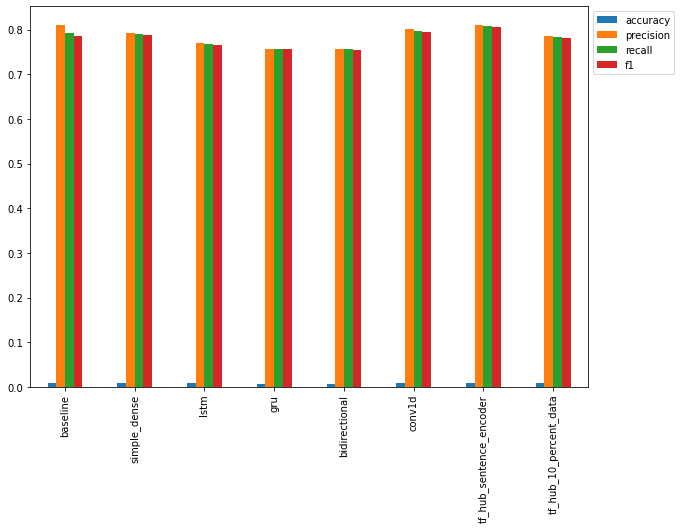

In [ ]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0,1.0));

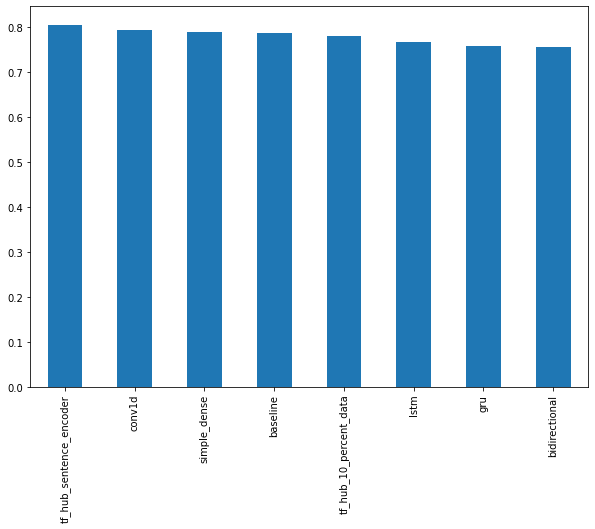

In [ ]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

In [ ]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "NLP modelling experiments" \
#   --description "A series of different NLP modellings experiments with various models" \
#   --one_shot # exits the uploader when upload has finished

In [ ]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.021156
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.765125
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.999891
3,@camilacabello97 Internally and externally scr...,1,0.0,0.116649
4,Radiation emergency #preparedness starts with ...,1,1.0,0.644562


In [ ]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
628,@noah_anyname That's where the concentration c...,0,1.0,0.999340
359,the windstorm blew thru my open window and now...,0,1.0,0.995336
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.992768
391,@heebsterrr_ I remember the heat wave the year...,0,1.0,0.991198
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.989237
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.987780
237,Came across this fire video not mine..enjoy..B...,0,1.0,0.975157
32,Excited not only about the next 6 years of sch...,0,1.0,0.975150
436,@nikistitz even the one that looked like a mud...,0,1.0,0.967766
41,@iphooey @TIME Ironically Michele Bachmann bro...,0,1.0,0.958703


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9993396997451782
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.9953359365463257
Text:
the windstorm blew thru my open window and now my bong is in pieces just another example of nature's indifference to human suffering

----

Target: 0, Pred: 1, Prob: 0.9927678108215332
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

----

Target: 0, Pred: 1, Prob: 0.9911981821060181
Text:
@heebsterrr_ I remember the heat wave the year I went bruh and they don't have AC ????

----

Target: 0, Pred: 1, Prob: 0.9892373085021973
Text:
Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm   http://t.co/6GLDwx71DA

----

Target: 0, Pred: 1, Prob: 0.9877800345420837
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Austra

In [ ]:
for row in most_wrong[-10:].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.0024186670780181885
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.0021406710147857666
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.0018554329872131348
Text:
CDC has a pretty cool list of all bioterrorism agents :3

----

Target: 1, Pred: 0, Prob: 0.0017805993556976318
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0, Prob: 0.0016558170318603516
Text:
Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube

----

Target: 1, Pred: 0, Prob: 0.0007895529270172119
Text:
How is it one careless match can start a forest fire but it takes a whole box to start a campfire?

----

Target: 1, Pred: 0, Prob: 0.0004951059818267822
Text:
Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy

----

Target: 1, Pred: 0, Prob: 0.0004760622978210449
Text:
Two hours to get to a clie

Making predictions on the test dataset

In [ ]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

pred: 0, Prob: 0.00052642822265625
Text:
I don't understand how White Iverson by Post Malone hasn't blown the fuck *UP* already.

----

pred: 0, Prob: 0.011796742677688599
Text:
Top link: Reddit's new content policy goes into effect many horrible subreddits banned or quarantined http://t.co/FEpjk1wEjD

----

pred: 1, Prob: 0.9893394708633423
Text:
Two buildings involved in fire on 2nd Street in #Manchester. @WMUR9 #wmur http://t.co/bCEUGsoi2r

----

pred: 0, Prob: 0.02282986044883728
Text:
I lava you ??

----

pred: 0, Prob: 0.10097932815551758
Text:
The Drowning Girl by Caitlin R. Kiernan Centipede Press Signed numbered Limited - Full reÛ_ http://t.co/CBaXj72lVC http://t.co/s9wXIDItJh

----

pred: 1, Prob: 0.9637434482574463
Text:
New-born piglet running down a national speed limit road is rescued #oink #Dorset http://t.co/dOMvOx2Oui http://t.co/iEVdj6KBU2

----

pred: 0, Prob: 0.0033318698406219482
Text:
Photo: 22 year old Yahoo Boy in Trouble for Attempting to Bribe EFCC Operatives

predicting our own tweets

In [ ]:
my_tweets = "i love besta so much like i wanna fuck her"

In [ ]:
def predict_on_sentence(model, sentence):
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")


In [ ]:
predict_on_sentence(model=model_6, # use the USE model
                    sentence=my_tweets)

Pred: 0.0 (not real disaster) Prob: 0.006005018949508667
Text:
i love besta so much like i wanna fuck her


In [ ]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
   
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_labesl_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names = ["Not Disaster", "Disaster"]

In [ ]:
confusion_matrix(y_true=val_labels, 
                      y_pred=model_6_preds)

array([[366,  48],
       [ 99, 249]])

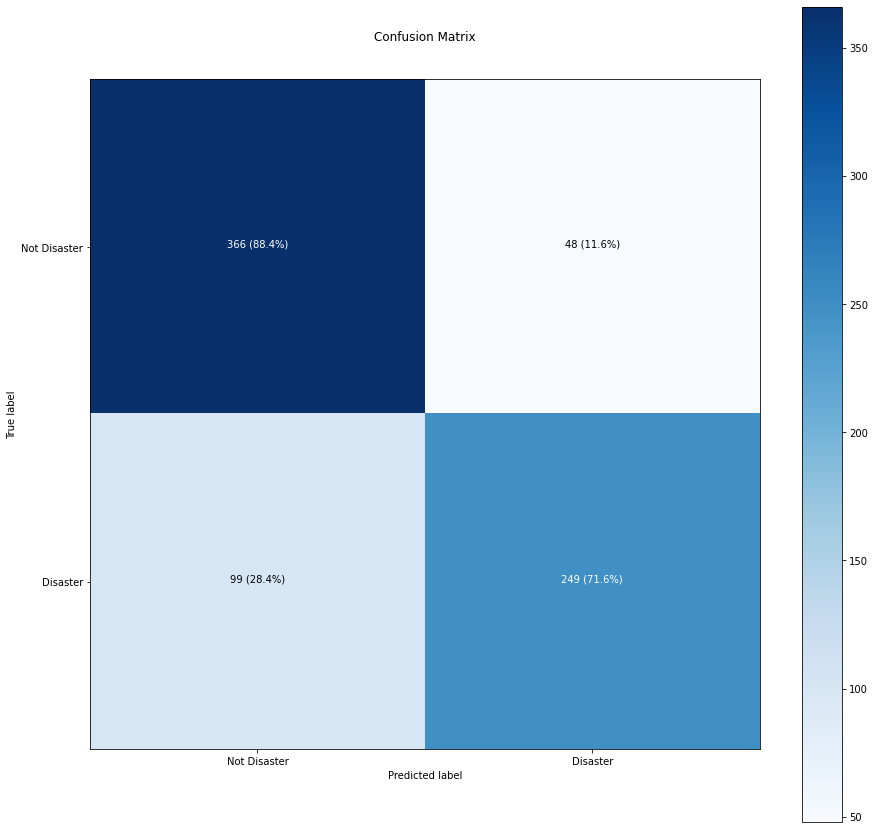

In [ ]:
make_confusion_matrix(y_true=val_labels, 
                      y_pred=model_6_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)